In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, roc_auc_score,
                           confusion_matrix, classification_report)

In [2]:
df = pd.read_csv(r"c:\Users\sohila\Downloads\IMDB Dataset.csv")
print(df.head(4))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative


In [3]:
print(df.tail(1))

                                                  review sentiment
49999  No one expects the Star Trek movies to be high...  negative


In [4]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [5]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [6]:
df.duplicated().sum()

418

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [8]:
print(df.shape)

(50000, 2)


In [9]:
print("Missing Data: ", df.isnull().sum())

Missing Data:  review       0
sentiment    0
dtype: int64


In [10]:
print("Cleaned Dataset: ", df.dropna(inplace=True))

Cleaned Dataset:  None


In [11]:
print("Missing Data: ", df.isnull().sum())

Missing Data:  review       0
sentiment    0
dtype: int64


In [12]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

In [13]:
# 2. Data Validation
print("Initial Data Inspection:")
print(f"Total samples: {len(df)}")
print(f"Sentiment distribution:\n{df['sentiment'].value_counts()}")

# 3. Convert sentiment to numerical values
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Verify conversion
print("\nAfter conversion:")
print(f"NaN values in target: {df['sentiment_numeric'].isna().sum()}")
print(f"Unique values: {df['sentiment_numeric'].unique()}")

Initial Data Inspection:
Total samples: 50000
Sentiment distribution:
sentiment
1    25000
0    25000
Name: count, dtype: int64

After conversion:
NaN values in target: 50000
Unique values: [nan]


In [14]:
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, test_labels))


Confusion Matrix:
[[4961    0]
 [   0 5039]]


In [15]:
print("\nClassification Report:")
print(classification_report(test_labels, test_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4961
           1       1.00      1.00      1.00      5039

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
train_texts_processed = train_texts.apply(preprocess_text)
test_texts_processed = test_texts.apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_texts_processed)
X_test = tfidf_vectorizer.transform(test_texts_processed)

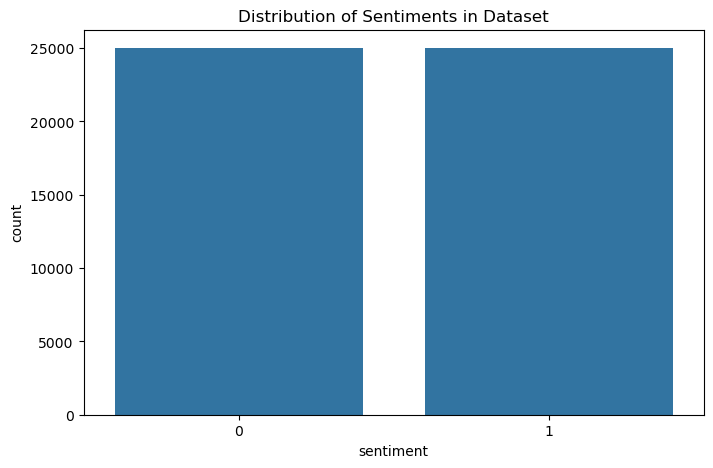

In [19]:
# Sentiment distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments in Dataset')
plt.show()

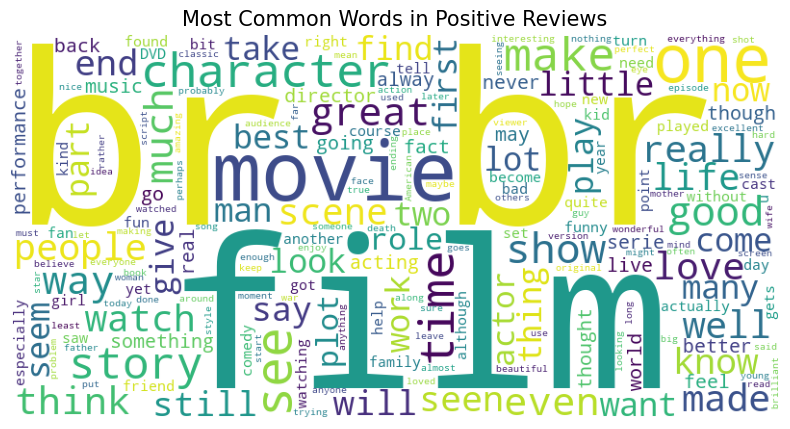

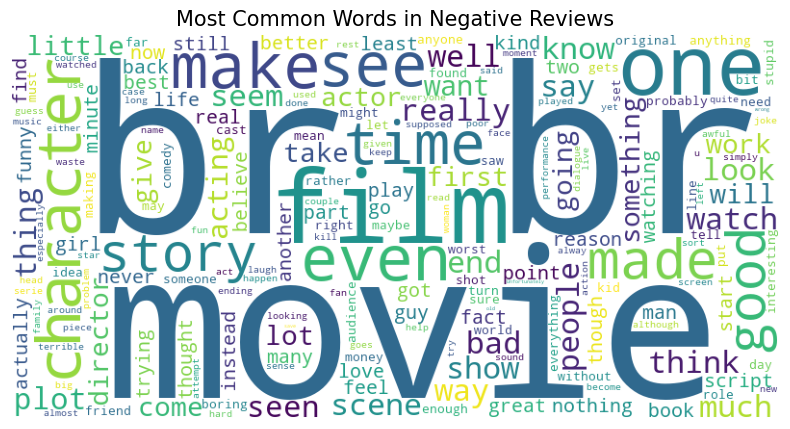

In [20]:
# Word cloud for positive/negative reviews
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title, size=15)
    plt.axis('off')
    plt.show()

# Positive reviews
positive_text = ' '.join(df[df['sentiment'] == 1]['review'])
plot_wordcloud(positive_text, 'Most Common Words in Positive Reviews')

# Negative reviews
negative_text = ' '.join(df[df['sentiment'] == 0]['review'])
plot_wordcloud(negative_text, 'Most Common Words in Negative Reviews')